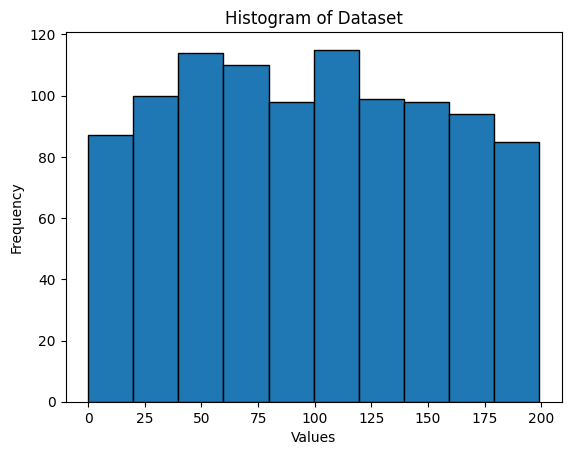

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/splitDataset.csv')

# Flatten all values into 1D before plotting
plt.hist(data.values.flatten(), bins=len(data.columns), edgecolor='black')

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Dataset")
plt.show()


In [3]:
values_list = data.values.flatten().tolist()
print(values_list)

[186, 13, 43, 12, 71, 45, 87, 38, 62, 54, 135, 179, 84, 158, 198, 0, 138, 91, 102, 23, 61, 64, 38, 62, 101, 16, 156, 55, 40, 108, 25, 159, 101, 128, 21, 128, 57, 27, 173, 78, 52, 61, 129, 57, 181, 47, 93, 145, 76, 87, 66, 40, 144, 194, 155, 77, 99, 34, 97, 111, 21, 142, 24, 189, 179, 152, 71, 20, 64, 164, 2, 90, 190, 141, 43, 93, 100, 80, 106, 111, 160, 98, 99, 120, 134, 162, 197, 128, 33, 7, 155, 161, 105, 167, 47, 47, 41, 92, 184, 22, 190, 158, 92, 28, 144, 79, 199, 184, 98, 21, 78, 19, 105, 168, 73, 14, 33, 22, 106, 133, 85, 151, 105, 0, 180, 156, 8, 118, 75, 33, 142, 48, 187, 194, 116, 62, 193, 137, 120, 48, 70, 168, 40, 155, 40, 40, 175, 150, 25, 134, 195, 23, 181, 116, 166, 51, 12, 142, 40, 45, 23, 2, 58, 173, 67, 27, 141, 19, 81, 169, 73, 167, 22, 59, 136, 56, 96, 135, 48, 3, 76, 109, 31, 142, 126, 76, 187, 119, 59, 112, 123, 192, 166, 12, 185, 158, 147, 166, 144, 109, 73, 188, 124, 97, 199, 1, 64, 132, 63, 132, 153, 17, 40, 28, 25, 71, 1, 10, 19, 32, 14, 1, 163, 47, 10, 72, 132

In [4]:
import numpy as np

bins = 10
values_array = np.array(values_list)
range_data = values_array.max() - values_array.min()
bin_width = range_data / bins

data = {}
for i in range(bins):
    start = values_array.min() + i * bin_width
    end   = start + bin_width
    value_list_data = values_array[(values_array>=start) & (values_array<=end) ]
    data[f'bin_{i+1}'] = np.unique(np.sort(value_list_data))


# for i in range(bins):
#     start = values_array.min() + i * bin_width
#     end   = start + bin_width
#     value_list_data = np.sort(values_array[(values_array>=start) & (values_array<=end) ])
#     data[f'bin_{i+1}'] = pd.Series(value_list_data)


new_df = pd.DataFrame(data)
new_df


,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,bin_10
0,0,20,40,60,80,100,120,140,160,180
1,1,21,41,61,81,101,121,141,161,181
2,2,22,42,62,82,102,122,142,162,182
3,3,23,43,63,83,103,123,143,163,183
4,4,24,44,64,84,104,124,144,164,184
5,5,25,45,65,85,105,125,145,165,185
6,6,26,46,66,86,106,126,146,166,186
7,7,27,47,67,87,107,127,147,167,187
8,8,28,48,68,88,108,128,148,168,188
9,9,29,49,69,89,109,129,149,169,189
